##Setup

In [76]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_style("white")
sns.set_context("talk", font_scale=1.2)

##Generate and select parents ($n = 5000, \mu = 50 \pm 15$)

In [77]:
loc = 50
scale = 15
parent_heights = sp.random.normal(loc=loc, scale=scale, size=5000)
selected_parents = [x for x in parent_heights if x > 55]
len(selected_parents)

1852

In [78]:
def plot_hist(d, title):
    plt.hist(d)
    plt.title(title)
    sns.despine()
    plt.show()

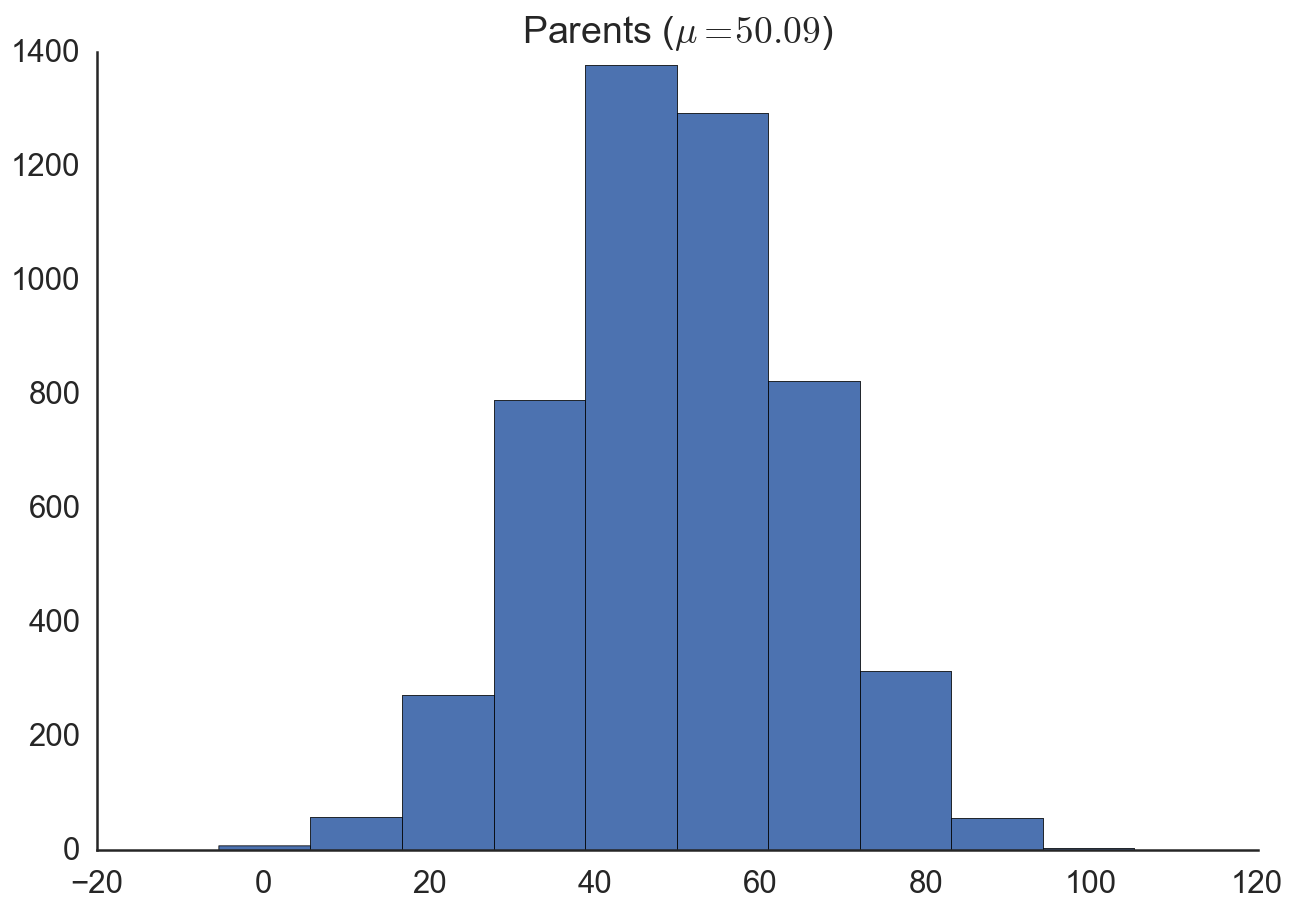

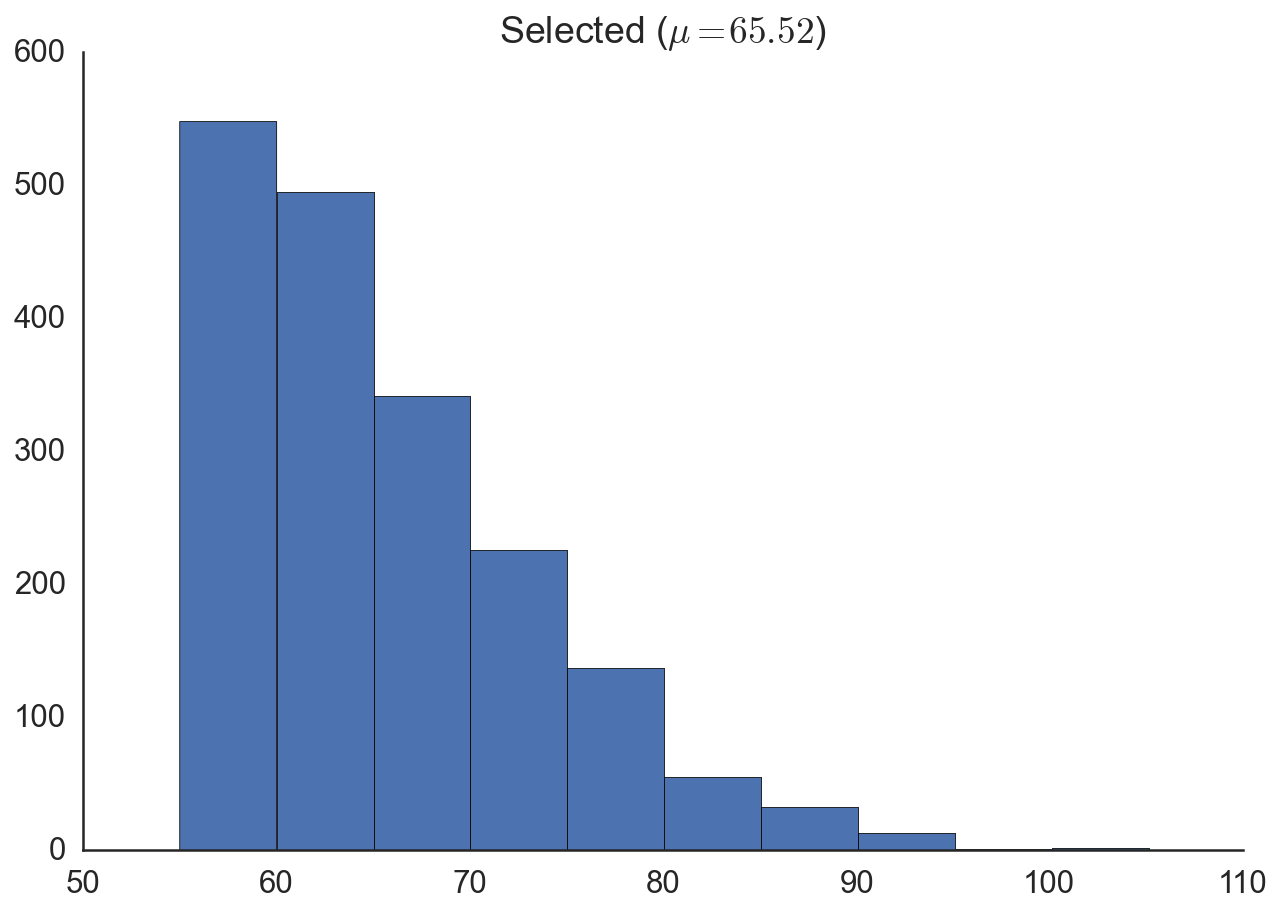

In [79]:
plot_hist(parent_heights, "Parents ($\mu=%.2f$)" % np.mean(parent_heights))
plot_hist(selected_parents, "Selected ($\mu=%.2f$)" % np.mean(selected_parents))

##Given heritibility of our trait, simulate offspring

In [80]:
h2 = 0.7
offspring_heights = []

def offspring_height(x):
    d = sp.random.uniform(0, 0.2)
    if sp.random.random() < 0.5:
        return x - x*d
    else:
        return x + x*d

for p in selected_parents:
    r = sp.random.random()
    if r < h2:
        offspring_heights.append(offspring_height(p))
    else:
        offspring_heights.append(sp.random.normal(scale=scale, loc=loc))

##Determine relationship between parents (selected) and their offspring

(0.76656359848086486, 11.284398312678121, 0.43319941410648422, 1.3716472423234509e-85, 0.037080273063023445)


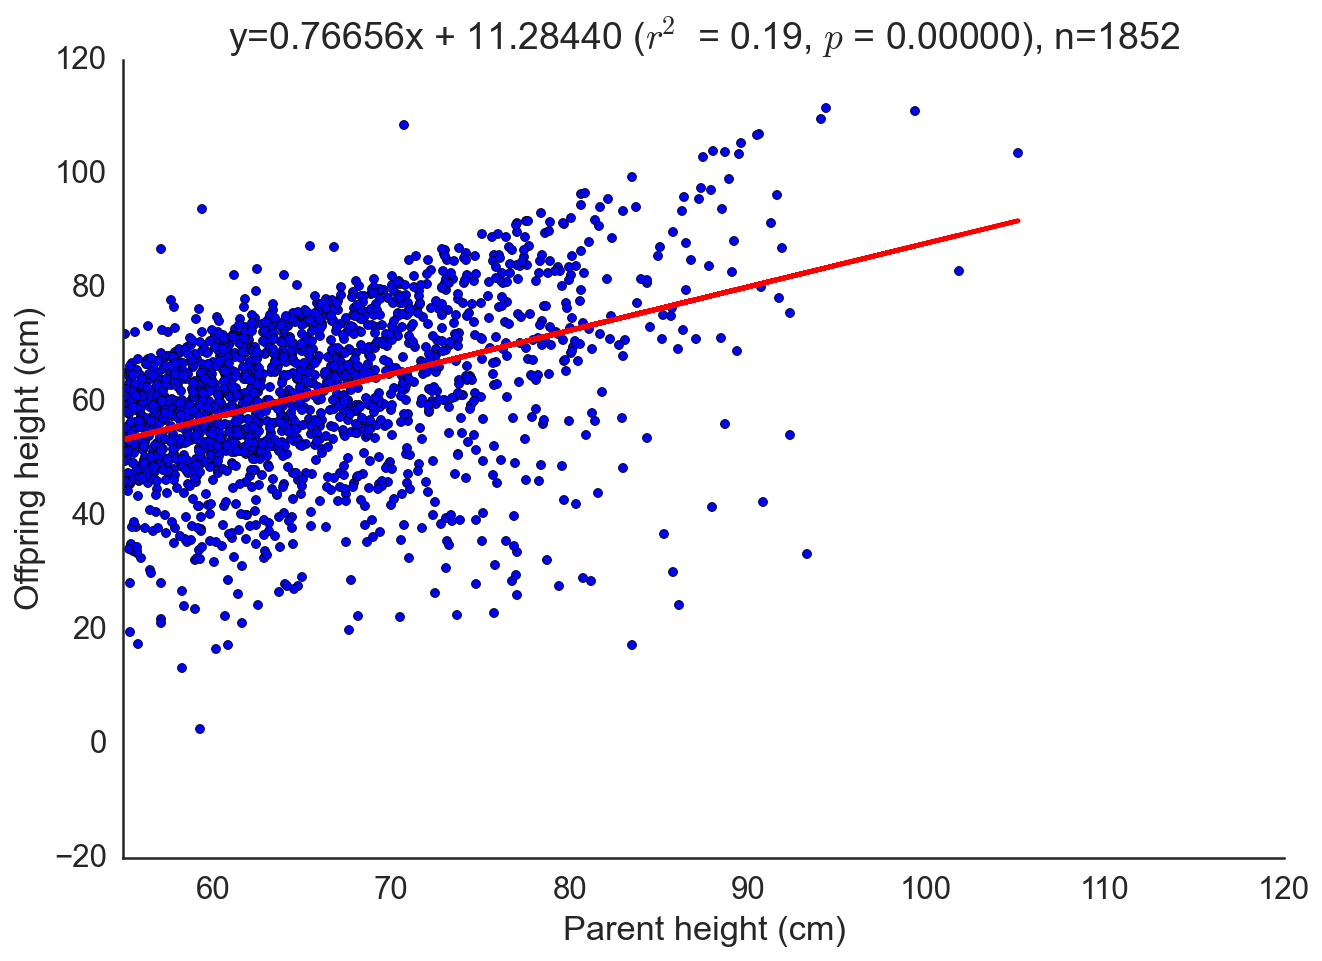

In [81]:
reg = sp.stats.linregress(selected_parents, 
                          offspring_heights)
print reg
slope, intercept, r_value, p_value, std_err = reg
plt.scatter(selected_parents, offspring_heights)
plt.xlabel("Parent height (cm)")
plt.ylabel("Offpring height (cm)")
plt.title("y=%.5fx + %.5f ($r^2$ = %.2f, $p$ = %.5f), n=%d" % (slope, 
                                                         intercept, 
                                                         r_value**2,
                                                         p_value,
                                                         len(offspring_heights)))
plt.plot(parent_heights,parent_heights*slope+intercept, 'r-')
plt.xlim((55,120))
sns.despine()
plt.show()

##$R = h^2S$

In [82]:
S = np.mean(selected_parents)-np.mean(parent_heights)
S

15.428898599246509

In [83]:
R = slope*S
R

11.827232030834779

In [84]:
new_mean = np.mean(parent_heights) + R
new_mean

61.917093814809689

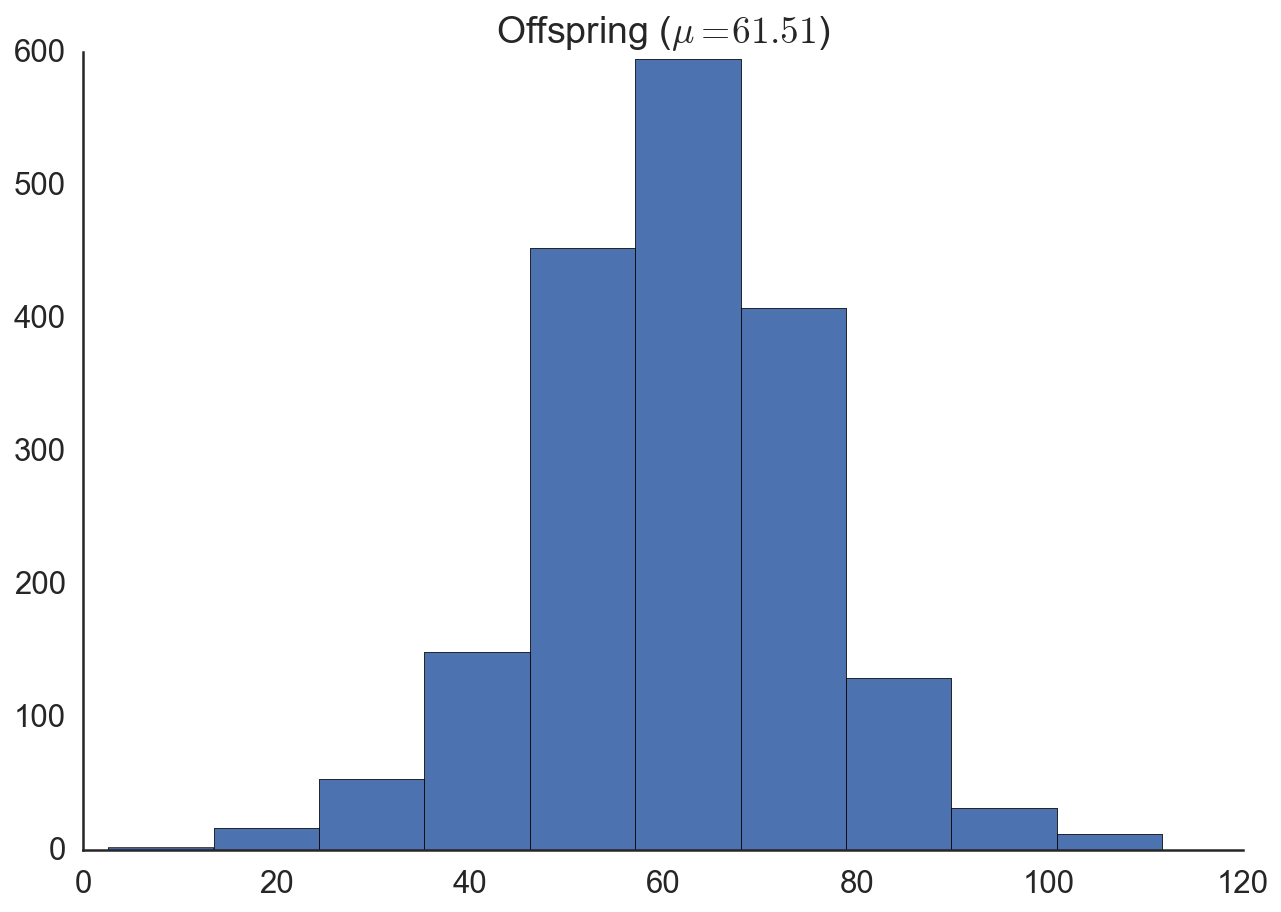

In [85]:
plot_hist(offspring_heights, "Offspring ($\mu=%.2f$)" % np.mean(offspring_heights))
